# SDSS LCSim, CoCo and pycoco
___

This notebook goes through the process of simulating a single SN using the actual SDSS cadence and Observing Conditions

In [1]:
# %matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import astropy as ap

import pycoco as pcc
import pyCoCo as pccsim

import lsst_tools as lsstt

import astropy.units as u

In [2]:
from lcsim.simlib import SIMLIBReader
from lcsim.lcsim import LCSim

In [35]:
def string_format_for_mapping(x):
    return pcc.utils.b("SDSS_" + x)


## SIMLIBS
---
Load in **`SNANA`** Simlib

In [3]:
simlib_file = "/Users/berto/projects/SDSS_sims/SDSS_SIMLIB/SDSS_2006.SIMLIB"

sl = SIMLIBReader(simlib_file=simlib_file)

Get Fields

In [4]:
sl.get_fields()

array(['82N', '82S'], dtype=object)

Get CCDs

In [5]:
sl.get_ccds(sl.get_fields()[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Get the RA Dec of the "fields"

In [6]:
sl.get_ccd_ra_dec(sl.get_fields()[0]).head()

,ccd,ra,dec
0,1,-59.718590,1.057539
1,2,-59.706146,-0.186179
2,3,-59.523289,-0.949059
3,4,-59.419392,0.242051
4,5,-58.926544,1.181189


In [7]:
obslog = sl.get_obslog(field = sl.get_fields()[0], ccd = 1, band="g")

In [8]:
obslog.sort_values("flt")

,ccd,field,mjd,idexpt,flt,gain,noise,skysigs,psf1,psf2,psfratio,zps,sigzps,mag,zpt,skysigt,ra,dec,mwebv
0,1,82N,53989.125,631300031,g,4.03,5.45,4.79,1.48,3.54,0.059,28.36,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
18,1,82N,54055.066,656400034,g,4.03,5.45,5.49,1.67,3.43,0.108,28.49,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
17,1,82N,54054.094,655900030,g,4.03,5.45,8.94,1.79,3.91,0.319,28.43,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
16,1,82N,54052.074,655200030,g,4.03,5.45,5.13,1.76,3.53,0.107,28.48,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
15,1,82N,54051.062,654800037,g,4.03,5.45,5.42,1.46,3.37,0.051,28.21,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
14,1,82N,54048.070,653300048,g,4.03,5.45,5.15,1.39,3.17,0.066,28.52,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
13,1,82N,54041.078,652200063,g,4.03,5.45,15.50,1.81,3.41,0.219,28.48,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
12,1,82N,54039.074,651300030,g,4.03,5.45,13.23,1.40,3.23,0.049,28.51,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
11,1,82N,54036.078,650400033,g,4.03,5.45,7.01,1.62,3.43,0.105,28.53,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181
19,1,82N,54058.070,657700037,g,4.03,5.45,5.28,1.34,3.34,0.042,28.47,0.008,-99.0,0.0,0.0,-59.71859,1.057539,0.181


In [36]:
obslog["flt"].map(string_format_for_mapping)

0     b'SDSS_g'
1     b'SDSS_g'
2     b'SDSS_g'
3     b'SDSS_g'
4     b'SDSS_g'
5     b'SDSS_g'
6     b'SDSS_g'
7     b'SDSS_g'
8     b'SDSS_g'
9     b'SDSS_g'
10    b'SDSS_g'
11    b'SDSS_g'
12    b'SDSS_g'
13    b'SDSS_g'
14    b'SDSS_g'
15    b'SDSS_g'
16    b'SDSS_g'
17    b'SDSS_g'
18    b'SDSS_g'
19    b'SDSS_g'
20    b'SDSS_g'
Name: flt, dtype: object

In [9]:
fltPath = b"/Users/berto/Code/CoCo/data/filters"
# rootPath = b"/Users/berto/Code/CoCo"
rootPath = b"/Users/berto/projects/stunt_CoCo"


coco = pccsim.pyCoCo(fltPath, rootPath)

In [10]:
filters_to_sim = np.array([b"SDSS_" + pcc.utils.b(i) for i in obslog.flt.values])

In [11]:
mjd_to_sim = obslog.mjd.values

In [13]:
z_obs = 0.1
snname = b"SN2011dh"
mjdmax = obslog.mjd.mean()
print(mjdmax)

flux, flux_err = coco.simulate(snname, 
                    z_obs, 0.0, 0.0, 0.0, 3.1, 
                    mjdmax, mjd_to_sim, 
                    filters_to_sim)

54029.142714285714


In [14]:
flux

array([  8.15806899e-22,   4.90057545e-21,   8.82540463e-21,
         5.29902497e-20,   9.38547703e-20,   3.04947106e-19,
         5.54529229e-19,   4.49298019e-18,   1.02230022e-17,
         1.08285652e-17,   1.03202859e-17,   8.35571192e-18,
         7.17477206e-18,   6.44667263e-18,   4.33871989e-18,
         3.62467024e-18,   3.40558295e-18,   2.99963244e-18,
         2.81841626e-18,   2.31188660e-18,   1.62896818e-18])

SDSS_g.dat
   MJD           flux       flux_err filter
--------- ----------------- -------- ------
53989.125 8.15806899177e-22      0.0 SDSS_g
54055.066  2.8184162564e-18      0.0 SDSS_g
54054.094 2.99963244193e-18      0.0 SDSS_g
54052.074 3.40558294724e-18      0.0 SDSS_g
54051.062 3.62467024124e-18      0.0 SDSS_g
 54048.07 4.33871988734e-18      0.0 SDSS_g
54041.078 6.44667262538e-18      0.0 SDSS_g
54039.074 7.17477206487e-18      0.0 SDSS_g
54036.078 8.35571192433e-18      0.0 SDSS_g
 54058.07 2.31188660292e-18      0.0 SDSS_g
54031.074 1.03202858601e-17      0.0 SDSS_g
54025.156 1.02230021577e-17      0.0 SDSS_g
54019.109  4.4929801896e-18      0.0 SDSS_g
54011.156 5.54529228731e-19      0.0 SDSS_g
54009.094 3.04947106307e-19      0.0 SDSS_g
54005.082 9.38547703478e-20      0.0 SDSS_g
54003.148 5.29902497242e-20      0.0 SDSS_g
53997.109 8.82540462868e-21      0.0 SDSS_g
53995.133 4.90057544517e-21      0.0 SDSS_g
54029.086 1.08285651866e-17      0.0 SDSS_g
54063.059 1.628968176

<IPython.core.display.Javascript object>


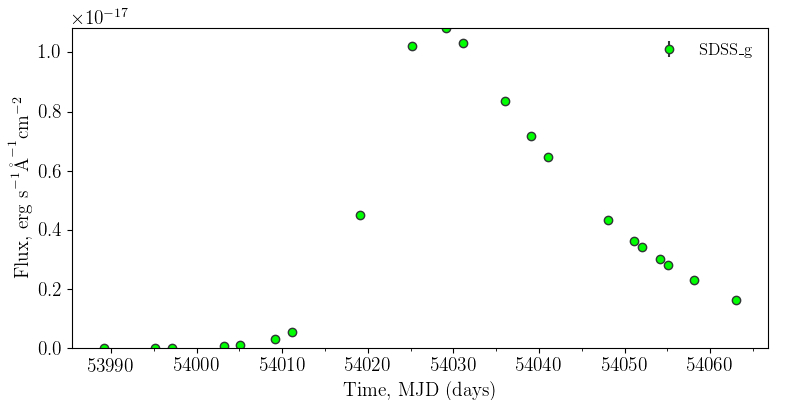

In [15]:
p = pcc.PhotometryClass()
p.load_table(pcc.utils.simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim))
p.plot(enforce_zero=True)

In [17]:
p_df = p.phot.to_pandas()

in order to calculate mags, map the **`calc_AB_zp`** function onto a column

In [18]:
p_df["zp"] = p_df["filter"].map(pcc.kcorr.calc_AB_zp)

In [19]:
p_df["mag"] = -2.5*np.log10(p_df.flux) - p_df.zp

In [20]:
p_df

,MJD,flux,flux_err,filter,zp,mag
0,53989.125,8.158069e-22,0.0,SDSS_g,20.754191,31.966840
1,53995.133,4.900575e-21,0.0,SDSS_g,20.754191,30.020191
2,53997.109,8.825405e-21,0.0,SDSS_g,20.754191,29.381472
3,54003.148,5.299025e-20,0.0,SDSS_g,20.754191,27.435319
4,54005.082,9.385477e-20,0.0,SDSS_g,20.754191,26.814668
5,54009.094,3.049471e-19,0.0,SDSS_g,20.754191,25.535247
6,54011.156,5.545292e-19,0.0,SDSS_g,20.754191,24.885998
7,54019.109,4.492980e-18,0.0,SDSS_g,20.754191,22.614472
8,54025.156,1.022300e-17,0.0,SDSS_g,20.754191,21.721863
9,54029.086,1.082857e-17,0.0,SDSS_g,20.754191,21.659381


Smear the observations - **`lcs.simulate`** takes mag, returns nanojansky  

In [22]:
lcs = LCSim()
flux, flux_error = lcs.simulate(p_df["mag"], obslog, unit = "ab")

In [24]:
p_df["njy"] = np.power(10., -0.4*(p_df["mag"]-31.4))

<IPython.core.display.Javascript object>


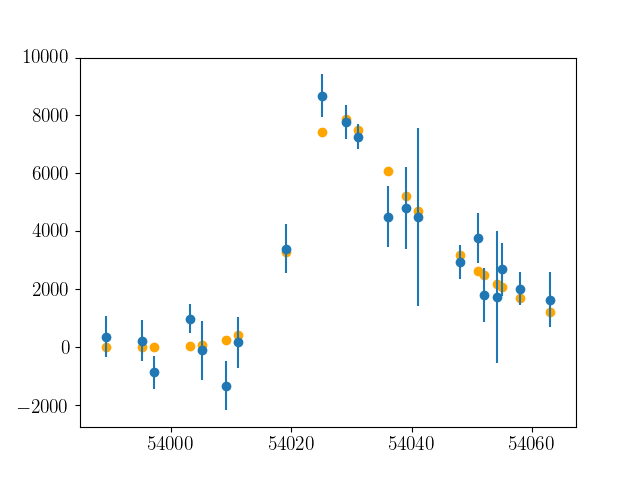

In [25]:
plt.errorbar(p_df.MJD, flux, yerr=flux_error, fmt = "o")
plt.scatter(p_df.MJD, p_df["njy"], color = "orange")

In [26]:
print(-2.5*np.log10(flux)+31.4)

0     25.030163
1     25.579111
2           NaN
3     23.936792
4           NaN
5           NaN
6     25.966106
7     22.572820
8     21.553292
9     21.674680
10    21.746857
11    22.266366
12    22.196908
13    22.272492
14    22.728822
15    22.463213
16    23.270557
17    23.310243
18    22.833101
19    23.147751
20    23.367906
dtype: float64


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [27]:
p_apt = ap.table.Table.from_pandas(p_df)

In [29]:
phot = pcc.PhotometryClass()
phot.load_table(p_apt)

SDSS_g.dat
   MJD           flux       flux_err ...      mag           njy      
--------- ----------------- -------- ... ------------- --------------
53989.125 8.15806899177e-22      0.0 ... 31.9668402212 0.593285742187
54055.066  2.8184162564e-18      0.0 ... 23.1207958177  2049.65927863
54054.094 2.99963244193e-18      0.0 ... 23.0531385507  2181.44656707
54052.074 3.40558294724e-18      0.0 ... 22.9153299993  2476.66918295
54051.062 3.62467024124e-18      0.0 ...    22.8476374  2635.99777892
 54048.07 4.33871988734e-18      0.0 ... 22.6524046244  3155.28178433
54041.078 6.44667262538e-18      0.0 ... 22.2224696145  4688.26502576
54039.074 7.17477206487e-18      0.0 ... 22.1062883843   5217.7665742
54036.078 8.35571192433e-18      0.0 ... 21.9408500091  6076.59086424
 54058.07 2.31188660292e-18      0.0 ... 23.3358923349  1681.29168857
54031.074 1.03202858601e-17      0.0 ... 21.7115793383  7505.30359853
54025.156 1.02230021577e-17      0.0 ... 21.7218625245   7434.5551976
54019.109

<IPython.core.display.Javascript object>


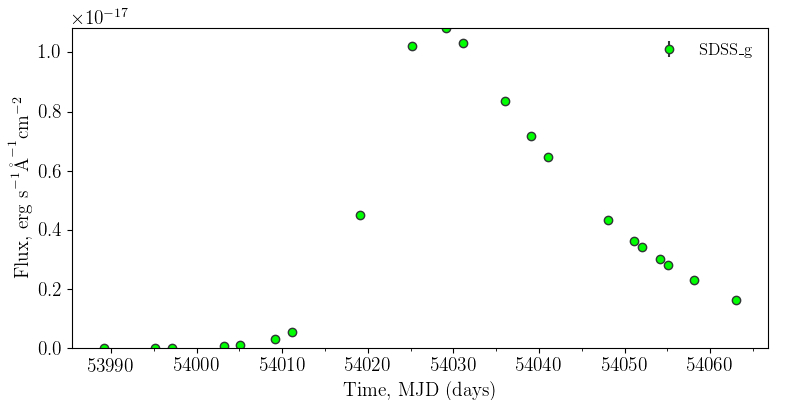

In [30]:
phot.plot()